In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.c_country import C_Country
from utils.graph_generator import get_path

from utils.dotdict import dotdict
from utils.params import init_graph, get_centrum
from utils.params import GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4, get_moving


import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")

import os
import pickle


In [5]:
import networkx as nx

In [6]:
args = {
    "--p_moving": 0.015, 
    "--p_worker": 1.0, 
    "--beta": 0.5,
    "--beta_super":0.0, 
    "--seed": 0,
    "--sigma": 1.0, 
    "--gamma": 0.2,
    "--max_sim": 500,
    "inf_agent_num":1000,
}

# Degree distribution

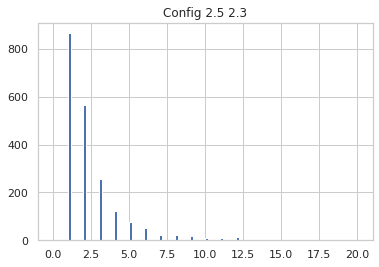

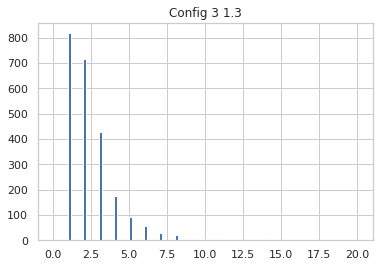

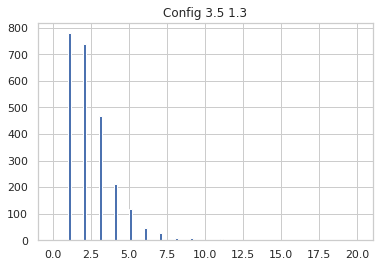

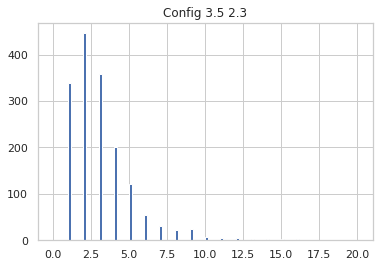

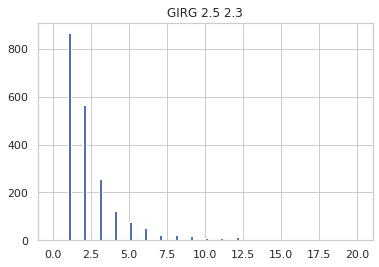

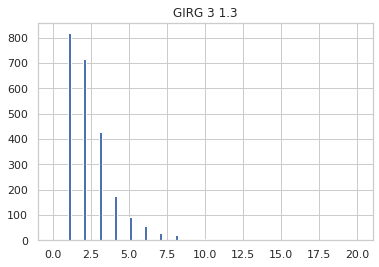

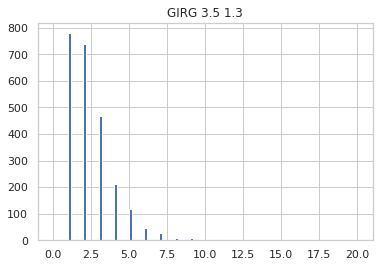

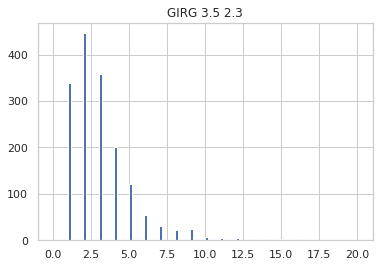

CPU times: user 10min 15s, sys: 1min 23s, total: 11min 39s
Wall time: 11min 40s


In [23]:
%%time
for config in [True, False]:
    for GIRG_args in [GIRG_args1, GIRG_args2, GIRG_args3, GIRG_args4]:        
        GIRG_args["N"]=5000
        GIRG_args["config_model"]=config
        GIRG_args["random_seed"]=0
        graph = init_graph(GIRG_args)
        
        degree = nx.degree(graph)
        plt.hist(dict(degree).values(), bins=100, range=(0,20))
        #plt.yscale('log')
        plt.title("{} {} {}".format("Config" if GIRG_args["config_model"] else "GIRG", GIRG_args["tau"], GIRG_args["alpha"]))
        plt.show()

In [22]:
GIRG_args1

{'name': 'GIRG',
 'N': 10000,
 'tau': 2.5,
 'alpha': 2.3,
 'C_1': 0.8,
 'whished_edgenum': 3000,
 'pop_in_city': 2000,
 'random_seed': 0,
 'verbose': False,
 'config_model': False,
 'edge_weigth': 12.987011987012988}

# Hierarchical graphs

[0, 1, 2, 3, 4] 1 4


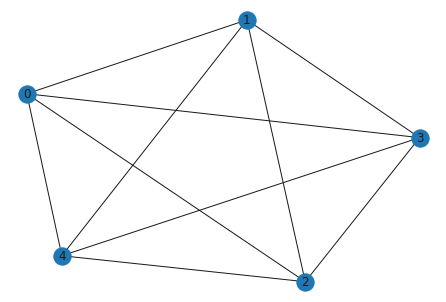

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 5 20


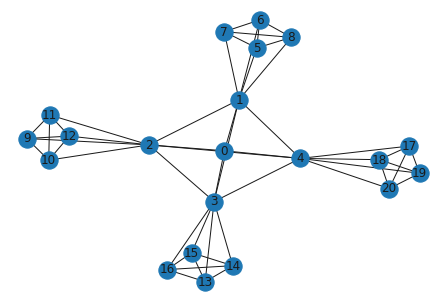

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84] 21 84


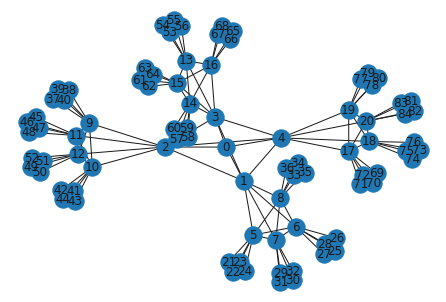

In [177]:
def extend_leafes(graph, n1, n2, k=4):
    ind0 = len(graph)
    
    for x in range(n2-n1+1):
        for j1 in range(k):
            x1 = ind0+k*x+j1
            graph.add_edge(n1+x,x1)
            #print(n1+x,x1)
            for j2 in range(j1+1,k):
                x2 = ind0+k*x+j2
                graph.add_edge(x1,x2)
                #print(x1,x2)

    return graph,ind0,x1

def get_hierarchical_graph(k):
    graph = nx.Graph()
    graph.add_node(0)
    a,b = 0,0

    shells = [[0]]
    for i in range(k):
        graph,a,b = extend_leafes(graph, a, b)
        shells.append(list(range(a,b+1)))
        
    return graph, shells

    
graph = nx.Graph()
graph.add_node(0)

graph,a,b = extend_leafes(graph, 0, 0)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

graph,a,b = extend_leafes(graph, a, b)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

graph,a,b = extend_leafes(graph, a, b)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

In [174]:
for i in range(1,5):
    print(i,sorted(dict(graph[i]).keys()))
    
print(i,sorted(dict(graph[20]).keys()))

1 [0, 2, 3, 4, 5, 6, 7, 8]
2 [0, 1, 3, 4, 9, 10, 11, 12]
3 [0, 1, 2, 4, 13, 14, 15, 16]
4 [0, 1, 2, 3, 17, 18, 19, 20]
4 [4, 17, 18, 19, 81, 82, 83, 84]


graph size:  84


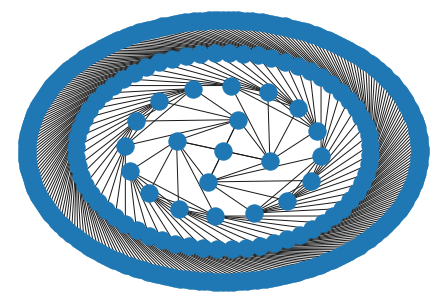

In [182]:
graph,shells = get_hierarchical_graph(4)

#print(80,sorted(dict(graph[80]).keys()))
print("graph size: ", b)

pos = nx.shell_layout(graph, shells)
nx.draw(graph, pos = pos)
plt.show()

In [184]:

len(graph)

1365

In [ ]:
inp_args = {
    "--s_nonlin": get_ss(params["N_ss"], params["n"]),
    "--seed":0,
    "--sim_num":params["sim_num"],
    "--mode":"simulation"
}

In [188]:
graph,shells = get_hierarchical_graph(5)
hun = C_Country(graph)
centrum = list(range(84+1))
inf_city = 30
betas = np.linspace(1.0*args["--gamma"], 2.0*args["--gamma"], 15)

get_graphstream(graph, init_seeds, args)
agg1 = hun.run_for_betas_simple_raw(args, centrum, betas, inf_city, "uniform_random")
periphery = [n for n in graph.nodes()]
#periphery = [n for n in graph.nodes() if n not in centrum]
agg2 = hun.run_for_betas_simple_raw(args, periphery, betas, inf_city, "uniform_random")


KeyError: 'weight'